In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import emoji

In [3]:
df=pd.read_csv("D:/YouTube Sentimetn Analysis/sentiment_analysis/dataset_with_vectors.csv")

C:\Users\PAMIR\AppData\Local\Temp\ipykernel_16404\3312944.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("D:/YouTube Sentimetn Analysis/sentiment_analysis/dataset_with_vectors.csv")


In [4]:
df

,Unnamed: 0,video_id,comment_text,likes,replies,comment_text_with_emoji_text,sentiment,cleaned_text,vector
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,Logan Paul it's yo big day :double_exclamation...,1,logan paul yo big day double_exclamation_mark:...,"[-1.0462948083877563, -0.5498138070106506, 0.2..."
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,I've been following you from the start of your...,1,follow start vine channel see 365 vlog,"[-0.3810676038265228, -0.7964183688163757, 0.3..."
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,Say hi to Kong and maverick for me,1,hi kong maverick,"[-0.19007253646850586, -1.3568511009216309, -0..."
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,MY FAN . attendance,2,fan attendance,"[-0.3453632891178131, -1.1349377632141113, -0...."
4,4,XpVt6Z1Gjjo,trending 😉,3,0,trending :winking_face:,1,trend winking_face,"[-1.01235032081604, -0.5077144503593445, -0.22..."
...,...,...,...,...,...,...,...,...,...
682912,691394,EoejGgUNmVU,Amazing!!!!!💚🌹💕🔥,2,0,Amazing!!!!!:green_heart::rose::two_hearts::fire:,1,amazing!!!!!:green_heart::rose::two_hearts::fire,"[-1.3923677206039429, -0.2665543556213379, 0.1..."
682913,691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,qu'est ce que j'aimerais que tu viennes à Roan...,1,qu'est ce que j'aimerais que tu vienne roanne,"[-0.47359201312065125, -0.9935471415519714, 0...."
682914,691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,Ven a mexico! :smiling_face_with_heart-eyes: t...,1,ven mexico smiling_face_with_heart eye te amo lp,"[-0.30305641889572144, -0.735672652721405, 0.1..."
682915,691398,EoejGgUNmVU,Islığı yeter...,0,0,Islığı yeter...,1,isl yeter,"[-0.5036119818687439, -0.16763633489608765, -0..."


In [102]:
df

,Unnamed: 0,video_id,comment_text,likes,replies
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...,...
691369,691395,EoejGgUNmVU,Лучшая,1,0
691370,691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691371,691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691372,691398,EoejGgUNmVU,Islığı yeter...,0,0


In [31]:
def convert_emojis_to_text(text):
    return emoji.demojize(text, delimiters=(":", ":"))

In [ ]:
df['comment_text_with_emoji_text'] = df['comment_text'].apply(convert_emojis_to_text)
df.head()

In [32]:
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return '2'
    elif score['compound'] <= -0.05:
        return '0'
    else:
        return '1'
df['sentiment'] = df['comment_text_with_emoji_text'].apply(get_vader_sentiment)

KeyboardInterrupt: 

In [105]:
df.shape

(691374, 7)

In [127]:
print(df['sentiment'].value_counts())

sentiment
2    316221
1    226623
0    140073
Name: count, dtype: int64


In [33]:
import spacy
import re
from langdetect import detect

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'#', '', text)        # Remove hashtag symbol
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'â|€|œ', '', text)    # Remove specific garbage characters
    text = text.strip()
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)


In [ ]:
df['cleaned_text'] = df['comment_text_with_emoji_text'].apply(preprocess)

In [108]:
df.to_csv('vectorized_cleaned_data.csv', index=False)

In [109]:
df

,Unnamed: 0,video_id,comment_text,likes,replies,comment_text_with_emoji_text,sentiment,cleaned_text
0,0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,Logan Paul it's yo big day :double_exclamation...,1,logan paul yo big day double_exclamation_mark:...
1,1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,I've been following you from the start of your...,1,follow start vine channel see 365 vlog
2,2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,Say hi to Kong and maverick for me,1,hi kong maverick
3,3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,MY FAN . attendance,2,fan attendance
4,4,XpVt6Z1Gjjo,trending 😉,3,0,trending :winking_face:,1,trend winking_face
...,...,...,...,...,...,...,...,...
691369,691395,EoejGgUNmVU,Лучшая,1,0,Лучшая,1,
691370,691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0,qu'est ce que j'aimerais que tu viennes à Roan...,1,qu'est ce que j'aimerais que tu vienne roanne
691371,691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0,Ven a mexico! :smiling_face_with_heart-eyes: t...,1,ven mexico smiling_face_with_heart eye te amo lp
691372,691398,EoejGgUNmVU,Islığı yeter...,0,0,Islığı yeter...,1,isl yeter


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the cleaned text data
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

# X is the sparse matrix, no need to convert it to a dense array
X = tfidf_matrix


In [7]:
X.shape

(682917, 122947)

In [8]:
y = df['sentiment']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_train)
print('Accuracy:', accuracy_score(y_train, y_pred))

Accuracy: 0.9046973183022077


In [28]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82     27836
           1       0.87      0.94      0.90     45567
           2       0.92      0.91      0.91     63181

    accuracy                           0.89    136584
   macro avg       0.89      0.88      0.88    136584
weighted avg       0.89      0.89      0.89    136584

Accuracy: 0.8915612370409418


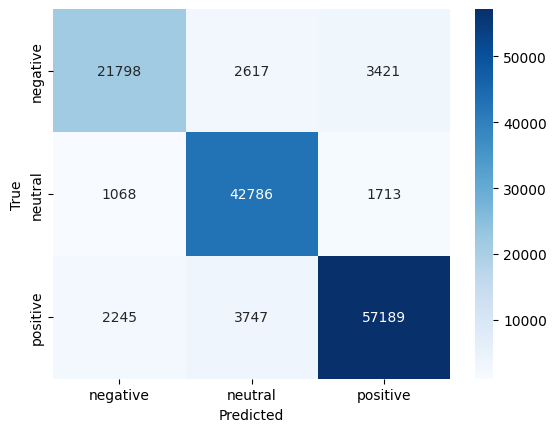

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

class_names = ['negative', 'neutral', 'positive']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [29]:
import joblib
joblib.dump((model, tfidf), 'YouTube_Sentiment_Analysis.pkl')

['YouTube_Sentiment_Analysis.pkl']

In [38]:
# Load the trained model from the file
model, tfidf = joblib.load('YouTube_Sentiment_Analysis.pkl')

# Now you can use the model to make predictions on new data
user_input = "what an amazing explanation. Finally! I understood cross validation concept so clearly. Thank You so much."
user_input_with_emoji = convert_emojis_to_text(user_input)
cleaned_input = preprocess(user_input_with_emoji)
tfidf_input = tfidf.transform([cleaned_input])
prediction = model.predict(tfidf_input)
print("Predicted Sentiment:", prediction)


Predicted Sentiment: [2]
